# Data Analysis Project:


#-----------------------------------------------------------------------

#Data source: Food and Agriculture Organization of the United Nations (FAO)
#Contact organisation unit: Statistics Division (ESS)
#Contact email address: faostat@fao.org
#Dataset Web-link: http://www.fao.org/faostat/en/?#data/SC
#Data Description: Supply Utilization Accounts (SUA) and Food Balance Sheet present a comprehensive picture of the pattern of a country's food supply during a specified reference period.
#Sector coverage: Most crop and livestock products, including processed products, under agricultural activity.
#Time coverage: 2014 - 2018
#Data format: Wide

#-----------------------------------------------------------------------
#Data Analyst: Hussam J. Omari
#contact_info: hussam2jamal@yahoo.com
#Youtube: Lareva Edu

In [1]:
"""
Suggested questions to be answered by the analysis of this dataset:
1. The total coutries crops production, import, export, and loss of each year?
2. Graph the total production means of countries (time series)
3. The highest 5 countries in total items production?
4. What are the major 5 items that the highest producers produce?
5. The lowest 5 countries in total items production?


"""

'\nSuggested questions to be answered by the analysis of this dataset:\n1.  the total coutries crops production, import, export, and loss of each year?\n2. the highest 5 countries in total items production?\n3. the lowest 5 countries in total items production?\n5. the highest 5 countries in exporting item?\n6. the lowest 5 countries in exporting item?\n7. the highest 5 countries in importing food?\n8. the lowest 5 countries in importing food?\n9. does all the highest items producers import less items comparing to other countries?\n10. what are the major 5 items that the highest producers produce?\n11. what are the major 5 items that the highest importers import?\n12. Graph section 1, 2, and 3\n'

In [3]:
#Importing libraries:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# importing csv file from a web link:
FAO_data ='SUA_Crops_E_All_Data_FOA.csv'
df = pd.read_csv(FAO_data)

# Discovering the Dataset

In [4]:
#Display rows and columns properties:
print("* Number of rows and columns:", df.shape)
print('* Columns labels:', df.columns)

* Number of rows and columns: (191465, 12)
* Columns labels: Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype='object')


In [4]:
print("Displaying the first 5 rows:")
df.head(6)

Displaying the first 5 rows:


,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,2,Afghanistan,221,"Almonds, with shell",5113,Opening stocks,tonnes,8058.0,7973.0,7859.0,7529.0,7135.0
1,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,27400.0,24246.0,32843.0,27291.0,34413.0
2,2,Afghanistan,221,"Almonds, with shell",5610,Import Quantity,tonnes,34.0,76.0,309.0,910.0,822.0
3,2,Afghanistan,221,"Almonds, with shell",5071,Stock Variation,tonnes,-86.0,-113.0,-331.0,-393.0,-425.0
4,2,Afghanistan,221,"Almonds, with shell",5910,Export Quantity,tonnes,2284.0,2815.0,7344.0,8803.0,9532.0
5,2,Afghanistan,221,"Almonds, with shell",5016,Loss,tonnes,1474.0,1304.0,1766.0,1468.0,1851.0


In [5]:
print("Displaying the last 5 rows:")
df.tail()

Displaying the last 5 rows:


,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
191460,181,Zimbabwe,15,Wheat,5520,Feed,tonnes,0.0,0.0,0.0,0.0,0.0
191461,181,Zimbabwe,15,Wheat,5525,Seed,tonnes,820.0,1629.0,1626.0,1635.0,1553.0
191462,181,Zimbabwe,15,Wheat,5016,Loss,tonnes,685.0,1545.0,1432.0,1320.0,1415.0
191463,181,Zimbabwe,15,Wheat,5023,Processed,tonnes,320000.0,306000.0,306667.0,293000.0,293333.0
191464,181,Zimbabwe,15,Wheat,5166,Residuals,tonnes,0.0,-89.0,0.0,19.0,0.0


In [6]:
print("Displaying all columns data types:")
df.dtypes

Displaying all columns data types:


Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Unit             object
Y2014           float64
Y2015           float64
Y2016           float64
Y2017           float64
Y2018           float64
dtype: object

In [7]:
#Display number of missing values:
print("Number of missing values in each column:")
print(df.isnull().sum())
print("Total:", df.isnull().sum().sum()) #total number of missings

Number of missing values in each column:
Area Code           0
Area                0
Item Code           0
Item                0
Element Code        0
Element             0
Unit                0
Y2014           14251
Y2015           13117
Y2016           12635
Y2017           11937
Y2018           15085
dtype: int64
Total: 67025


<AxesSubplot:>

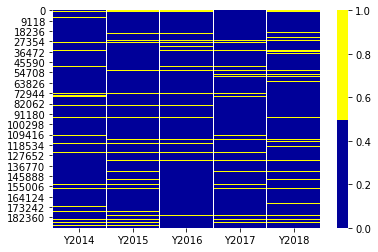

In [8]:
#Visualizing missing values with seaborn:
cols = df.columns[7:12] # just Year (2014-2018) columns
colours = ['#000099', '#ffff00'] #  - yellow represents missing values.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# Data Processing

"""" The Columns 'Element Code' are numeric type (int/float), and since we will not perform calculations on these columns elements, we are going to change them to a string(object)."""

In [9]:
#Dropping specific columns:
try:
    df = df.drop(columns = ['Element Code']) #drop unneeded column
except:
    print("Process is completed") #dispaly message instead of raising error
    print(df.columns) #for checking out columns after dropping
#Exceptin handling code is to avoid the error may raise from dropping the columns which are already droped
#by the first .drop() excution

In [10]:
#converting some numeric columns to categorical:
from pandas.api.types import CategoricalDtype
df['Area Code'] = df['Area Code'].astype('category')
df['Item Code'] = df['Item Code'].astype('category')
#df['Element Code'] = df['Element Code'].astype('category')
print(df.dtypes)

Area Code    category
Area           object
Item Code    category
Item           object
Element        object
Unit           object
Y2014         float64
Y2015         float64
Y2016         float64
Y2017         float64
Y2018         float64
dtype: object


In [11]:
#Selecting needed rows:
element_list = ['Production', 'Import Quantity', 'Export Quantity', 'Loss']
is_elem = df.Element.isin(element_list) #df.Element ise column that contain the values mentioned in the list
#.isin() to check each element in the DataFrame is contained in values or not.
df = df[is_elem]
#export as csv:
#df.to_csv(r'filtered_FAO_SUA.csv')

# Handling with Missing Data:


In [12]:
#--------------------------------------------------------
#after studying the data structure, it is best to leave the data as it is; without filling and
#without removing rows with missing data, because missing data will not affect the stastical 
#calculation that we are gonna perform.
#----------------------------------------------------------

In [13]:
#One of the countries has alien characters (C�te d'Ivoire)
df['Area'] = df['Area'].replace(["C�te d'Ivoire"], "Ivory Coast") #change value

#check the results:
df.set_index(df.Area, inplace = True)
df.loc['Ivory Coast'] #check results

,Area Code,Area,Item Code,Item,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
Area,,,,,,,,,,,
Ivory Coast,107,Ivory Coast,221,"Almonds, with shell",Production,tonnes,1578.0,1519.0,1533.0,1543.0,1532.0
Ivory Coast,107,Ivory Coast,221,"Almonds, with shell",Import Quantity,tonnes,0.0,1.0,3.0,14.0,3.0
Ivory Coast,107,Ivory Coast,221,"Almonds, with shell",Export Quantity,tonnes,0.0,0.0,0.0,0.0,1.0
Ivory Coast,107,Ivory Coast,221,"Almonds, with shell",Loss,tonnes,85.0,82.0,82.0,83.0,82.0
Ivory Coast,107,Ivory Coast,711,"Anise, badian, fennel, coriander",Import Quantity,tonnes,7.0,3.0,5.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
Ivory Coast,107,Ivory Coast,137,Yams,Import Quantity,tonnes,NaN,22.0,11.0,15.0,79.0
Ivory Coast,107,Ivory Coast,137,Yams,Export Quantity,tonnes,9228.0,10817.0,10120.0,11308.0,13056.0
Ivory Coast,107,Ivory Coast,137,Yams,Loss,tonnes,465432.0,500415.0,518852.0,537890.0,545759.0


In [14]:
#Export cleaned data to check:
df.to_csv(r'cleaned_FAO_SUA.csv')

# Data Analysis

# 1. The total coutries crops production, import, export, and loss of each year?"""

Y2014    942790.965525
Y2015    945013.323446
Y2016    951181.776924
Y2017    976971.977322
Y2018    975738.261695
dtype: float64


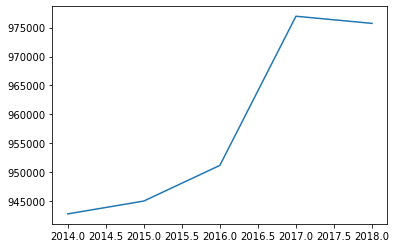

In [15]:
#Show the total production of all countries in each year
#make a list of all countries names to be used in filtering:
countries = []
for c in df.Area.unique():
    countries.append(c)
#Filter production rows of all countries:
production = ["Production"]
countries_production = df[df.Element.isin(production) & df.Area.isin(countries)]
print(countries_production.mean()) #display production means of all countries

#graph the production means:
x_axis =  [2014, 2015, 2016, 2017, 2018]
plt.plot(x_axis, countries_production.mean())
plt.show()

# 2. The highest 5 countries in total items production:

In [15]:
#filter data based on production rows only:
filter_df= df[df["Element"] == "Production"]
df2 = filter_df.sort_values(['Element', 'Y2014'], ascending=False)

#Display the highest 5 countries in production crops in each year:
Ylist = ["Y2014", "Y2015", "Y2016", "Y2017", "Y2018"]
for year in Ylist:
    largest_5 = df2.nlargest(5, year)
    print(largest_5)
#largest_5.to_csv("largest_producers.csv")


        Area Code                      Area  Item Code         Item  \
25557          21                    Brazil        156   Sugar cane   
182633        231  United States of America         56        Maize   
80744         100                     India        156   Sugar cane   
37410          41           China, mainland         56        Maize   
37822          41           China, mainland         27  Rice, paddy   

        Element Code     Element    Unit        Y2014        Y2015  \
25557           5510  Production  tonnes  736108487.0  750290277.0   
182633          5510  Production  tonnes  361091140.0  345486340.0   
80744           5510  Production  tonnes  352142000.0  362333000.0   
37410           5510  Production  tonnes  215646300.0  264992000.0   
37822           5510  Production  tonnes  206507400.0  212142000.0   

              Y2016        Y2017        Y2018  
25557   768594154.0  758646205.0  746828157.0  
182633  412262180.0  371096030.0  364262150.0  
80744   

# The Items that the highest 5 producers produce are:
#From the previous code, the highest crops produced in the world untill 2018 are:
#Sugar cane,  Maize, and Rice 

# The lowest 5 countries in total items production

In [11]:
filter_df= df[df["Element"] == "Production"]
df2 = filter_df.sort_values(['Element', 'Y2014'], ascending=True)

#Display the highest 5 countries in production crops in each year:
Ylist = ["Y2014", "Y2015", "Y2016", "Y2017", "Y2018"]
for year in Ylist:
    lowest_5 = df2.nsmallest(5, year)
    print(lowest_5)
#lowest_5.to_csv("lowest_producers.csv")

      Area Code         Area  Item Code                          Item  \
324           2  Afghanistan        446                  Maize, green   
615           2  Afghanistan        447             Sweet corn frozen   
621           2  Afghanistan        448  Sweet corn prep or preserved   
1119          3      Albania        541              Fruit, stone nes   
1665          3      Albania         27                   Rice, paddy   

      Element Code     Element    Unit  Y2014  Y2015  Y2016  Y2017  Y2018  
324           5510  Production  tonnes    0.0    NaN    NaN    NaN    NaN  
615           5510  Production  tonnes    0.0    0.0    NaN    NaN    NaN  
621           5510  Production  tonnes    0.0    0.0    NaN    NaN    NaN  
1119          5510  Production  tonnes    0.0    0.0    0.0    0.0    0.0  
1665          5510  Production  tonnes    0.0    0.0    0.0    0.0    0.0  
      Area Code         Area  Item Code                          Item  \
615           2  Afghanistan    